In [1]:
import kagglehub

path = kagglehub.dataset_download("awsaf49/coco-2017-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\tan04\.cache\kagglehub\datasets\awsaf49\coco-2017-dataset\versions\2


In [2]:
base_path = path
training_image_path = "\\coco2017\\train2017"
training_label_path = "\\coco2017\\annotations\\instances_train2017.json"


In [3]:
import json

with open(base_path + training_label_path, 'r') as file:
    data = json.load(file)


In [4]:
cat_id2name = {cat["id"]:cat["name"] for cat in data["categories"]}
cat_name2id = {cat["name"]:cat["id"] for cat in data["categories"]}
image_id2file = { image['id']: image['file_name'] for image in data['images']}

In [5]:
images_label = dict()
for obj in data['annotations']:
    image_id = obj["image_id"]
    if image_id in images_label:
        images_label[image_id]["segmentation"].append(obj["segmentation"])
        images_label[image_id]["area"].append(obj["area"])
        images_label[image_id]["iscrowd"].append(obj["iscrowd"])
        images_label[image_id]["bbox"].append(obj["bbox"])
        images_label[image_id]["category_id"].append(obj["category_id"])
    else:
        label = {
            "segmentation": [obj["segmentation"]],
            "area": [obj["area"]],
            "iscrowd": [obj["iscrowd"]],
            "bbox": [obj["bbox"]],
            "category_id": [obj["category_id"]]
        }
        images_label[image_id] = label
        
    
    


In [6]:
list(images_label.keys())

[558840,
 200365,
 495357,
 116061,
 16164,
 205350,
 74,
 212545,
 514915,
 154589,
 471175,
 225919,
 400728,
 194306,
 383780,
 580255,
 370210,
 75283,
 325969,
 251716,
 13882,
 185156,
 176697,
 376608,
 178939,
 173350,
 26654,
 346071,
 158497,
 408307,
 252203,
 263146,
 390348,
 395230,
 426342,
 155997,
 278435,
 47263,
 519838,
 283119,
 369190,
 458424,
 239985,
 151988,
 364010,
 205573,
 427639,
 233660,
 32054,
 153692,
 174871,
 37017,
 569729,
 378163,
 412764,
 98194,
 382406,
 70815,
 235126,
 79966,
 354537,
 4678,
 57936,
 560830,
 361022,
 373193,
 535483,
 555669,
 270744,
 351840,
 307993,
 145544,
 184771,
 187349,
 282134,
 378561,
 7125,
 386165,
 346965,
 559950,
 459566,
 537955,
 392659,
 20671,
 357542,
 57703,
 191280,
 424378,
 278550,
 209468,
 511463,
 236954,
 329011,
 176474,
 33405,
 49097,
 540449,
 504900,
 161141,
 210012,
 200023,
 272153,
 386968,
 374990,
 135116,
 534829,
 546642,
 210060,
 553436,
 106166,
 558671,
 276719,
 82312,
 26730,

In [12]:
images_label[list(images_label.keys())[1231]].keys()

dict_keys(['segmentation', 'area', 'iscrowd', 'bbox', 'category_id'])

In [14]:
import cv2
COLOUR = (0,0,255)

def show_image(image_id):
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    thickness = 2
    color = (0, 0,255)
    
    image = cv2.imread(base_path + training_image_path + f'\\{image_id2file[image_id]}')
    
    for bbox, cat_id in zip(images_label[image_id]["bbox"], images_label[image_id]["category_id"]):
    
        top_left = (int(bbox[0]), int(bbox[1]))
    
        box_width = int(bbox[2])
        box_height = int(bbox[3])
        
        
        bottom_right = (top_left[0] + box_width, top_left[1] + box_height)
    
        cv2.rectangle(image, top_left, bottom_right, COLOUR, 1)
        
        cv2.putText(image, f"{cat_id2name[cat_id]}", top_left, font, font_scale, color, thickness)
    
    
    cv2.imshow(f"{image_id}", image)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    

In [15]:
import random

for x in range(10):
    
    image_id = random.choice(list(images_label.keys()))
    show_image(image_id)


In [16]:
import torch
from torchvision.models.detection import fasterrcnn_resnet50_fpn

model = fasterrcnn_resnet50_fpn(pretrained=True)
model.eval()  



C:\Users\tan04\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\tan04\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


FasterRCNN(
  (transform): GeneralizedRCNNTransform(
      Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
      Resize(min_size=(800,), max_size=1333, mode='bilinear')
  )
  (backbone): BackboneWithFPN(
    (body): IntermediateLayerGetter(
      (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
      (bn1): FrozenBatchNorm2d(64, eps=0.0)
      (relu): ReLU(inplace=True)
      (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
      (layer1): Sequential(
        (0): Bottleneck(
          (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn1): FrozenBatchNorm2d(64, eps=0.0)
          (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
          (bn2): FrozenBatchNorm2d(64, eps=0.0)
          (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn3): FrozenBatchNorm2d(256, eps=0.0)
          (relu): ReLU(

In [17]:
image_id = random.choice(list(images_label.keys()))
image = cv2.imread(base_path + training_image_path + f'\\{image_id2file[image_id]}')
image = cv2.imread("C:\\Users\\tan04\\Downloads\\abc.jpg")
image = image[:, :, [2, 1, 0]]

image_tensor = torch.from_numpy(image).permute(2, 0, 1)



image_tensor = image_tensor/255

In [18]:
with torch.no_grad():
    predictions = model([image_tensor])

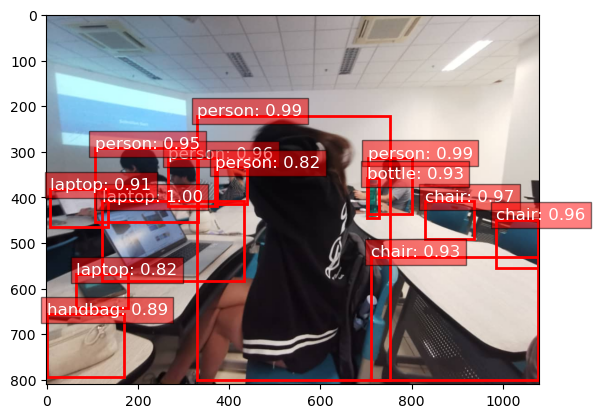

In [19]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Get predictions for boxes with a confidence threshold
threshold = 0.8
boxes = predictions[0]['boxes']
scores = predictions[0]['scores']
labels = predictions[0]['labels']

filtered_boxes = boxes[scores > threshold]
filtered_scores = scores[scores > threshold]
filtered_labels = labels[scores > threshold]


fig, ax = plt.subplots(1)
ax.imshow(image)

for box, score, label in zip(filtered_boxes, filtered_scores, filtered_labels):
    xmin, ymin, xmax, ymax = box
    rect = patches.Rectangle(
        (xmin, ymin), xmax - xmin, ymax - ymin, linewidth=2, edgecolor='r', facecolor='none'
    )
    ax.add_patch(rect)
    ax.text(xmin, ymin, f'{cat_id2name[label.item()]}: {score:.2f}', color='white', fontsize=12, bbox=dict(facecolor='red', alpha=0.5))

plt.show()


In [42]:
show_image(image_id)

In [12]:
import json
import cv2

with open('our_image_data.json', 'r') as infile:
    
    
    data = json.load(infile)
    

for image_name, annotation in data.items():
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    font_scale = 0.7
    thickness = 2
    color = (0, 0,255)
    
    image = cv2.imread("our_image\\" + image_name)
    
    for bbox, cat_id in zip(annotation["bboxs"], annotation["categories"]):
    
        top_left = (int(bbox[0]), int(bbox[1]))
    
        box_width = int(bbox[2])
        box_height = int(bbox[3])
        
        
        bottom_right = (top_left[0] + box_width, top_left[1] + box_height)
    
        cv2.rectangle(image, top_left, bottom_right, COLOUR, 1)
        
        cv2.putText(image, f"{cat_id2name[cat_id]}", top_left, font, font_scale, color, thickness)
    
    
    cv2.imshow(f"{image_id}", image)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()